In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
dir=r'Dataset'
train_path=dir+'\\'+'Train'
test_path=dir+'\\'+'Test'

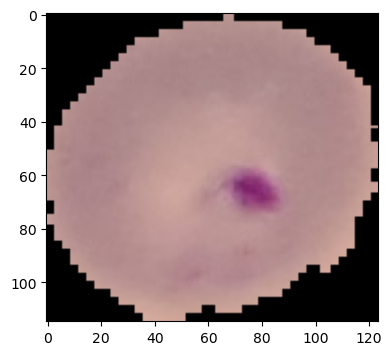

In [3]:
plt.figure(figsize=(5,4))
img1=cv2.imread(test_path+'\\'+"Parasite"+'\\'+'C39P4thinF_original_IMG_20150622_105554_cell_10.png')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

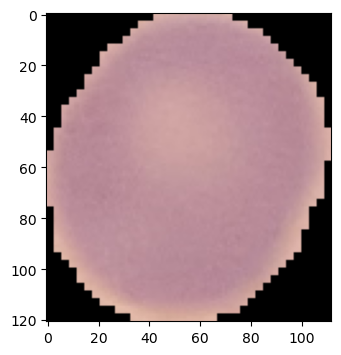

In [4]:
plt.figure(figsize=(5,4))
img2=cv2.imread(test_path+'\\'+'Uninfected'+'\\'+os.listdir(test_path+'\\'+"Uninfected")[10])
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [5]:
img2.shape

(121, 112, 3)

In [6]:
print(len(os.listdir(train_path+'\\'+'Parasite')))
print(len(os.listdir(train_path+'\\'+'Uninfected')))

220
196


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
Img_Gen=ImageDataGenerator(rotation_range=15,horizontal_flip=True,rescale=1/255,shear_range=0.1,
                           zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,fill_mode='nearest')

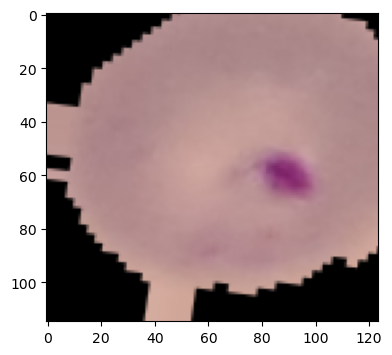

In [9]:
plt.figure(figsize=(5,4))
plt.imshow(Img_Gen.random_transform(img1))

In [248]:
train_imgs=Img_Gen.flow_from_directory(train_path,target_size=(130,130),color_mode='rgb',batch_size=10,shuffle=True)

test_imgs=Img_Gen.flow_from_directory(test_path,target_size=(130,130),color_mode='rgb',batch_size=10,shuffle=True)

Found 416 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [250]:
train_imgs.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,AveragePooling2D,Input,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [252]:
early_stop=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [254]:
model=Sequential()
model.add(Input(shape=(130,130,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [256]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,338 (6.34 MB)

 Trainable params: 1,662,338 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [258]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
history=model.fit(train_imgs,epochs=20,validation_data=test_imgs,callbacks=[early_stop])

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.5595 - loss: 0.8377 - val_accuracy: 0.3778 - val_loss: 0.6940
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.5443 - loss: 0.6991 - val_accuracy: 0.6815 - val_loss: 0.6922
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.5574 - loss: 0.6935 - val_accuracy: 0.6815 - val_loss: 0.6421
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.5531 - loss: 0.6826 - val_accuracy: 0.3185 - val_loss: 0.7556
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.6208 - loss: 0.6394 - val_accuracy: 0.3778 - val_loss: 0.9205
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.7232 - loss: 0.5360 - val_accuracy: 0.5852 - val_loss: 0.6364
Epoch 7/20
 5/42 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.6887 - loss: 0.5388

In [228]:
losses=pd.DataFrame(history.history)

<Axes: >

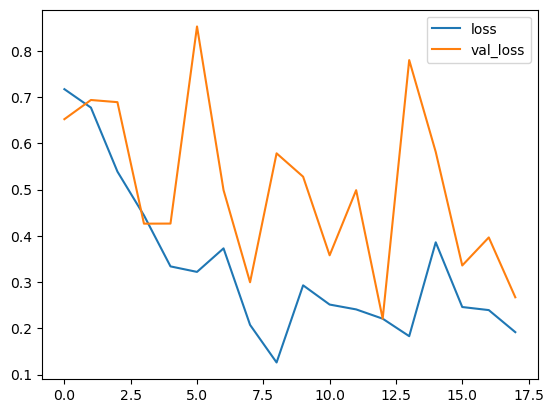

In [230]:
losses[['loss','val_loss']].plot()

In [236]:
pred=model.predict(test_imgs)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


In [182]:
from sklearn.metrics import classification_report,confusion_matrix

In [240]:
pred=[np.argmax(i) for i in pred]

In [246]:
pred

[1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0]

In [242]:
test_imgs.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [244]:
print(classification_report(pred,test_imgs.classes))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        80
           1       0.44      0.35      0.39        55

    accuracy                           0.56       135
   macro avg       0.53      0.52      0.52       135
weighted avg       0.54      0.56      0.54       135

